In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('airplane.csv')

In [3]:
df.head()

,Mach Number,Altitude (m),Airspeed (m/s),Lift Force (N),Thrust (N),Fuel Flow Rate (kg/s),Wing Area (m²),Bypass Ratio,Flight Regime
0,0.100000,0.000000,36.483571,5399.677718,1597.446518,0.659219,24.704760,4.215248,Subsonic (low)
1,0.101902,15.015015,33.955325,5175.630155,1762.350104,0.766814,25.972214,4.215023,Subsonic (low)
2,0.103804,30.030030,38.531736,4756.441812,1573.685435,0.814345,26.065063,3.952283,Subsonic (low)
3,0.105706,45.045045,43.555089,4416.471551,1724.728658,1.047327,26.766003,4.251099,Subsonic (low)
4,0.107608,60.060060,35.415820,5102.364910,1254.738423,0.917067,24.025789,4.469389,Subsonic (low)


In [4]:
df['Flight Regime'].unique()

array(['Subsonic (low)', 'Subsonic (high)', 'Transonic', 'Supersonic'],
      dtype=object)

In [5]:
df['Flight Regime']=df['Flight Regime'].map({'Subsonic (low)':0, 'Subsonic (high)':1, 'Transonic':2, 'Supersonic':3}).astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mach Number            1000 non-null   float64
 1   Altitude (m)           1000 non-null   float64
 2   Airspeed (m/s)         1000 non-null   float64
 3   Lift Force (N)         1000 non-null   float64
 4   Thrust (N)             1000 non-null   float64
 5   Fuel Flow Rate (kg/s)  1000 non-null   float64
 6   Wing Area (m²)         1000 non-null   float64
 7   Bypass Ratio           1000 non-null   float64
 8   Flight Regime          1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


In [7]:
y=df['Flight Regime']
x=df.drop(columns=['Flight Regime'])

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [9]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [10]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred=model.predict(x_test_scaled)

In [12]:
acc=accuracy_score(y_test,y_pred)

In [13]:
print(f"Accuracy={acc}")

Accuracy=1.0


In [14]:
class_report=classification_report(y_test,y_pred)

In [15]:
print("classification report")
print(class_report)

classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        56
         2.0       1.00      1.00      1.00        35
         3.0       1.00      1.00      1.00        88

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Actual')

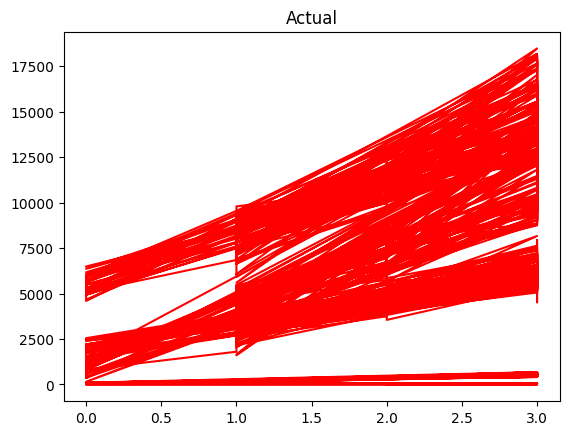

In [17]:
x=y_test
y=y_pred
plt.plot(x,x_test,color='red',label='y_test')
plt.title("Actual")

Text(0.5, 1.0, 'predicted')

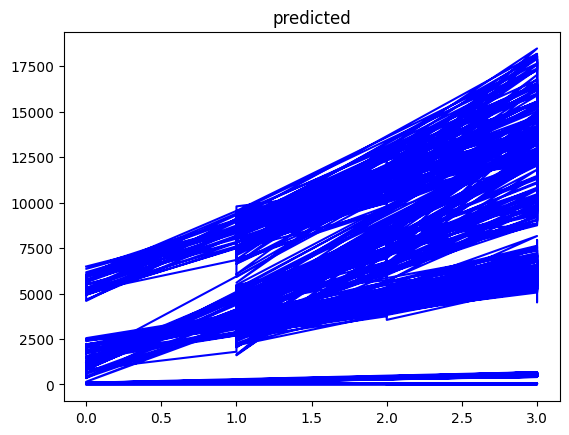

In [18]:
plt.plot(y,x_test,color='blue',label='y_pred')
plt.title("predicted")

Text(0.5, 1.0, 'actual v/s predicted')

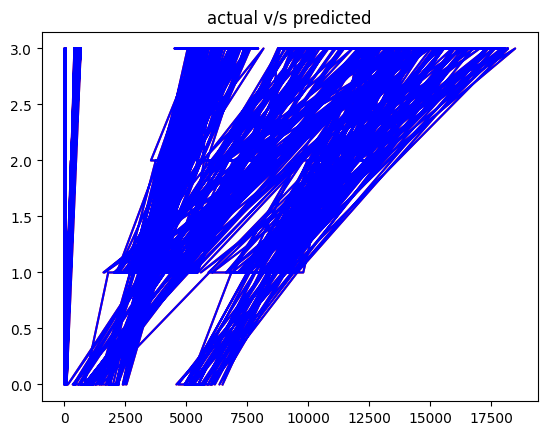

In [19]:
plt.plot(x_test,x,color='red',label='y_test')
plt.plot(x_test,y,color='blue',label='y_pred')
plt.title("actual v/s predicted")

In [22]:
mach=int(input("Enter mach number:"))
alt=int(input("Enter altitude(m):"))
air_spd=int(input("Enter air speed(m/s):"))
force=int(input("Enter Lift Force (N):"))
thrust=int(input("Enter thrust (N):"))
fuel=int(input("Enter fuel flow rate (kg/s):"))
wing_area=int(input("Enter wing area (m^2):"))
ratio=float(input("Enter Bypass ratio:"))
data={'Mach Number':[mach],'Altitude (m)':[alt],'Airspeed (m/s)':[air_spd],'Lift Force (N)':[force],'Thrust (N)':[thrust],'Fuel Flow Rate (kg/s)':[fuel],'Wing Area (m²)':[wing_area],'Bypass Ratio':[ratio]}
user_data=pd.DataFrame(data)

Enter mach number: 2
Enter altitude(m): 3456
Enter air speed(m/s): 3456
Enter Lift Force (N): 78876
Enter thrust (N): 345
Enter fuel flow rate (kg/s): 3455
Enter wing area (m^2): 456
Enter Bypass ratio: 4


In [23]:
x_test=pd.concat([x_test,user_data],ignore_index=True)
print(x_test.tail())

     Mach Number  Altitude (m)  Airspeed (m/s)  Lift Force (N)   Thrust (N)  \
196     0.731431   4984.984985      249.065709     9013.298585  3238.932170   
197     0.495596   3123.123123      171.077741     6767.866533  2892.869378   
198     1.265866   9204.204204      424.766949    12822.142463  5295.641203   
199     0.248348   1171.171171       84.897242     6488.818334  2203.211162   
200     2.000000   3456.000000     3456.000000    78876.000000   345.000000   

     Fuel Flow Rate (kg/s)  Wing Area (m²)  Bypass Ratio  
196               1.956131       33.446414      6.245528  
197               1.533433       28.670678      5.281613  
198               2.638381       36.890097      7.816229  
199               1.095925       26.900963      4.811933  
200            3455.000000      456.000000      4.000000  


In [24]:
print('Subsonic (low):0', 'Subsonic (high):1', 'Transonic:2', 'Supersonic:3')

Subsonic (low):0 Subsonic (high):1 Transonic:2 Supersonic:3


In [25]:
y_pred=model.predict(x_test)
regime_type=y_pred[-1]
print("Predicted regime for user input=",regime_type)

Predicted regime for user input= 3.0


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [26]:
import seaborn as sns

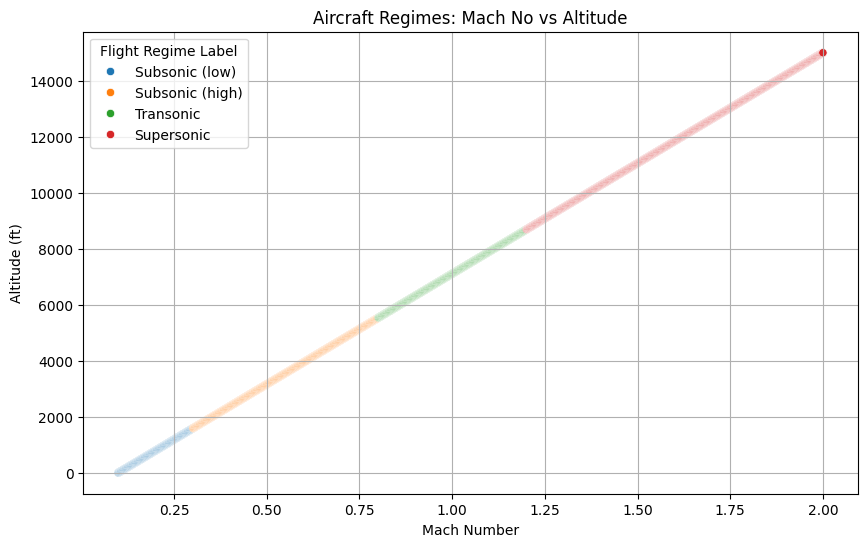

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Mach Number', y='Altitude (m)', hue='Flight Regime Label', palette='tab10')
plt.title("Aircraft Regimes: Mach No vs Altitude")
plt.xlabel("Mach Number")
plt.ylabel("Altitude (ft)")
plt.grid(True)
plt.show()